<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exercise-1:-Logit" data-toc-modified-id="Exercise-1:-Logit-1">Exercise 1: Logit</a></span></li><li><span><a href="#Exercise-2:-LDA" data-toc-modified-id="Exercise-2:-LDA-2">Exercise 2: LDA</a></span></li><li><span><a href="#Exercise-3:-QDA" data-toc-modified-id="Exercise-3:-QDA-3">Exercise 3: QDA</a></span></li><li><span><a href="#Exercise-4:-Curse-of-dimensionality" data-toc-modified-id="Exercise-4:-Curse-of-dimensionality-4">Exercise 4: Curse of dimensionality</a></span><ul class="toc-item"><li><span><a href="#(a)-Constant-feature-range,-$p=1$" data-toc-modified-id="(a)-Constant-feature-range,-$p=1$-4.1">(a) Constant feature range, $p=1$</a></span></li><li><span><a href="#(b)-Constant-feature-range,-$p-=-2$" data-toc-modified-id="(b)-Constant-feature-range,-$p-=-2$-4.2">(b) Constant feature range, $p = 2$</a></span></li><li><span><a href="#(c)-Constant-feature-range,-$p-=-100$" data-toc-modified-id="(c)-Constant-feature-range,-$p-=-100$-4.3">(c) Constant feature range, $p = 100$</a></span></li><li><span><a href="#(d)-KNN-with-large-$p$" data-toc-modified-id="(d)-KNN-with-large-$p$-4.4">(d) KNN with large $p$</a></span></li><li><span><a href="#(e)-Constant-fraction" data-toc-modified-id="(e)-Constant-fraction-4.5">(e) Constant fraction</a></span></li></ul></li><li><span><a href="#Exercise-5:-LDA-vs-QDA" data-toc-modified-id="Exercise-5:-LDA-vs-QDA-5">Exercise 5: LDA vs QDA</a></span><ul class="toc-item"><li><span><a href="#(a)-Linear" data-toc-modified-id="(a)-Linear-5.1">(a) Linear</a></span></li><li><span><a href="#(b)-Non-linear" data-toc-modified-id="(b)-Non-linear-5.2">(b) Non-linear</a></span></li><li><span><a href="#(c)-Sample-size" data-toc-modified-id="(c)-Sample-size-5.3">(c) Sample size</a></span></li></ul></li><li><span><a href="#Exercise-6:-Logistic-regression" data-toc-modified-id="Exercise-6:-Logistic-regression-6">Exercise 6: Logistic regression</a></span><ul class="toc-item"><li><span><a href="#(a)-Predictors---&gt;-probability" data-toc-modified-id="(a)-Predictors--->-probability-6.1">(a) Predictors --&gt; probability</a></span></li><li><span><a href="#(b)-Probability---&gt;-predictor" data-toc-modified-id="(b)-Probability--->-predictor-6.2">(b) Probability --&gt; predictor</a></span></li></ul></li><li><span><a href="#Exercise-7:-Bayes'-theorem" data-toc-modified-id="Exercise-7:-Bayes'-theorem-7">Exercise 7: Bayes' theorem</a></span></li><li><span><a href="#Exercise-8:-Errors" data-toc-modified-id="Exercise-8:-Errors-8">Exercise 8: Errors</a></span></li><li><span><a href="#Exercise-9:-Odds" data-toc-modified-id="Exercise-9:-Odds-9">Exercise 9: Odds</a></span><ul class="toc-item"><li><span><a href="#(a)-Odds---&gt;-probability" data-toc-modified-id="(a)-Odds--->-probability-9.1">(a) Odds --&gt; probability</a></span></li><li><span><a href="#(b)-Probability---&gt;-odds" data-toc-modified-id="(b)-Probability--->-odds-9.2">(b) Probability --&gt; odds</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

HC = ['#e41a1c', '#377eb8', '#ff7f00', '#4daf4a', 
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#dede00']

# Exercise 1: Logit
##### Using a little bit of algebra, prove that (4.2) is equivalent to (4.3). In other words, the logistic function representation and logit representation for the logistic regression model are equivalent.

$$
\begin{align}
p(X) &= \frac{\exp(\beta_0 + \beta_1 X)}{1+\exp(\beta_0 + \beta_1 X)}\tag{4.2, logistic}\\
\frac{p(X)}{1-p(X)} &= \frac{\exp(\beta_0 + \beta_1 X)}{1+\exp(\beta_0 + \beta_1 X)}\cdot\left(1-\frac{\exp(\beta_0 + \beta_1 X)}{1+\exp(\beta_0 + \beta_1 X)}\right)^{-1}\\
&= \frac{\exp(\beta_0 + \beta_1 X)}{1+\exp(\beta_0 + \beta_1 X)}\cdot\left(\frac{1}{1+\exp(\beta_0 + \beta_1 X)}\right)^{-1}\\
&= \exp(\beta_0 + \beta_1 X)\tag{4.3, logit}
\end{align}
$$

# Exercise 2: LDA
##### It was stated in the text that classifying an observation to the class for which (4.12) is largest is equivalent to classifying an observation to the class for which (4.13) is largest. Prove that this is the case. In other words, under the assumption that the observations in the kth class are drawn from a $N(\mu_k, \sigma^2 )$ distribution, the Bayes’ classiﬁer assigns an observation to the class for which the discriminant function is maximized.

$$
\begin{align}
\require{cancel}
p_k(x) &= \frac{\pi_k\cancel{(\sqrt{2\pi}\sigma)^{-1}}\exp\left(-(2\sigma^2)^{-1}\cdot(x-\mu_k)^2\right)}{\sum_{l=1}^K\pi_l\cancel{(\sqrt{2\pi}\sigma)^{-1}}\exp\left(-(2\sigma^2)^{-1}\cdot(x-\mu_l)^2\right)}\tag{4.12}\\
\mathop{\mathrm{argmax}}_k p_k(x) &= \mathop{\mathrm{argmax}}_k \frac{\pi_k\exp\left(-(2\sigma^2)^{-1}\cdot(x-\mu_k)^2\right)}{\sum_{l=1}^K\pi_l\exp\left(-(2\sigma^2)^{-1}\cdot(x-\mu_l)^2\right)}
\end{align}
$$

$$
\begin{cases}
\pi \ge 0 \because \text{probability}\\ 
\exp(n) \gt 0 \because e \gt 0
\end{cases}
\implies \text{denominator} \ge 0
$$

And given $\text{denominator}\mathrel{\unicode{x2AEB}} k$,

$$
\mathop{\mathrm{argmax}}_k p_k(x) = \mathop{\mathrm{argmax}}_k \pi_k\exp\left(-\frac{1}{2\sigma^2}\cdot(x-\mu_k)^2\right)
$$

$\because \log(x)$ is monotonically increasing,

$$
\begin{align}
\mathop{\mathrm{argmax}}_k p_k(x) &= \mathop{\mathrm{argmax}}_k \log p_k(x)\\
&= \mathop{\mathrm{argmax}}_k\log\left(\pi_k\exp\left(-\frac{1}{2\sigma^2}\cdot(x-\mu_k)^2\right)\right)\\
&= \mathop{\mathrm{argmax}}_k\left(\log(\pi_k)-\frac{1}{2\sigma^2}\cdot(x-\mu_k)^2\right)\\
& = \mathop{\mathrm{argmax}}_k\left(\log(\pi_k) - x^2\cdot\frac{1}{2\sigma^2} + x\cdot\frac{\cancel{2}\mu_k}{\cancel{2}\sigma^2} - \frac{\mu_k^2}{2\sigma^2}\right)
\end{align}
$$

Given $-x^2\cdot\frac{1}{2\sigma^2} \mathrel{\unicode{x2AEB}} k$,

$$
\begin{align}
\mathop{\mathrm{argmax}}_k p_k(x) &= \mathop{\mathrm{argmax}}_k\left(x\cdot\frac{\mu_k}{\sigma^2} - \frac{\mu_k^2}{2\sigma^2} + \log(\pi_k)\right)\\
& = \mathop{\mathrm{argmax}}_k\delta_k(x)\quad\text{where}\\
\delta_k(x) &= x\cdot\frac{\mu_k}{\sigma^2} - \frac{\mu_k^2}{2\sigma^2} + \log(\pi_k)\tag{4.13, discriminant}
\end{align}
$$

# Exercise 3: QDA
##### This problem relates to the QDA model, in which the observations within each class are drawn from a normal distribution with a class-speciﬁc mean vector and a class speciﬁc covariance matrix. We consider the simple case where $p = 1$; i.e. there is only one feature.

##### Suppose that we have $K$ classes, and that if an observation belongs to the kth class then $X$ comes from a one-dimensional normal distribution, $X ∼ N(\mu_k, \sigma_k^2)$. Recall that the density function for the one-dimensional normal distribution is given in (4.11). Prove that in this case, the Bayes' classiﬁer is not linear. Argue that it is in fact quadratic.

##### _Hint: For this problem, you should follow the arguments laid out in Section 4.4.2, but without making the assumption that $\sigma_1^2 = ... = \sigma_K^2$._

Similar to Eq 4.12,

$$
\begin{align}
p_k(x) &= \frac{\pi_k(\cancel{\sqrt{2\pi}}\sigma_k)^{-1}\exp\left(-(2\sigma_k^2)^{-1}\cdot(x-\mu_k)^2\right)}{\sum_{l=1}^K\pi_l(\cancel{\sqrt{2\pi}}\sigma_l)^{-1}\exp\left(-(2\sigma_l^2)^{-1}\cdot(x-\mu_l)^2\right)}\\
\mathop{\mathrm{argmax}}_k p_k(x) &= \mathop{\mathrm{argmax}}_k \frac{\pi_k(\sigma_k)^{-1}\exp\left(-(2\sigma_k^2)^{-1}\cdot(x-\mu_k)^2\right)}{\sum_{l=1}^K\pi_l(\sigma_l)^{-1}\exp\left(-(2\sigma_l^2)^{-1}\cdot(x-\mu_l)^2\right)}
\end{align}
$$

$$
\begin{cases}
\pi \ge 0 \because \text{probability}\\
\sigma \ge 0 \because \text{square root of variance}\\
\exp(n) \gt 0 \because e \gt 0
\end{cases}
\implies \text{denominator} \ge 0
$$

And given $\text{denominator}\mathrel{\unicode{x2AEB}} k$,

$$
\mathop{\mathrm{argmax}}_k p_k(x) = \mathop{\mathrm{argmax}}_k\left(\frac{\pi_k}{\sigma_k}\exp\left(-\frac{1}{2\sigma_k^2}\cdot(x-\mu_k)^2\right)\right)\\
$$

$\because \log(x)$ is monotonically increasing,

$$
\begin{align}
\mathop{\mathrm{argmax}}_k p_k(x) &= \mathop{\mathrm{argmax}}_k \log p_k(x)\\
&= \mathop{\mathrm{argmax}}_k\log\left(\frac{\pi_k}{\sigma_k}\exp\left(-\frac{1}{2\sigma_k^2}\cdot(x-\mu_k)^2\right)\right)\\
&= \mathop{\mathrm{argmax}}_k\left(\log(\pi_k) - \log(\sigma_k) - \frac{1}{2\sigma^2}\cdot(x-\mu_k)^2\right)\\
&= \mathop{\mathrm{argmax}}_k\left(\log(\pi_k) - \log(\sigma_k) - x^2\cdot\frac{1}{2\sigma_k^2} + x\cdot\frac{\cancel{2}\mu_k}{\cancel{2}\sigma_k^2} - \frac{\mu_k^2}{2\sigma^2}\right)\\
&= \mathop{\mathrm{argmax}}_k\left(- x^2\cdot\frac{1}{2\sigma_k^2} + x\cdot\frac{\mu_k}{\sigma_k^2} - \frac{\mu_k^2}{2\sigma^2} - \log(\sigma_k) + \log(\pi_k)\right)\\
&= \mathop{\mathrm{argmax}}_k \delta_k(x)\quad\text{where}\\
\delta_k(x) &= - x^2\cdot\frac{1}{2\sigma_k^2} + x\cdot\frac{\mu_k}{\sigma_k^2} - \frac{\mu_k^2}{2\sigma^2} - \log(\sigma_k) + \log(\pi_k)\tag{c.f. 4.23}\\
\end{align}
$$

The Bayes' classifier is quadratic because the discriminant function is quadratic.

# Exercise 4: Curse of dimensionality
##### When the number of features p is large, there tends to be a deterioration in the performance of KNN and other _local_ approaches that perform prediction using only observations that are _near_ the test observation for which a prediction must be made. This phenomenon is known as the _curse of dimensionality_, and it ties into the fact that non-parametric approaches often perform poorly when $p$ is large. We will now investigate this curse.

**_REFERENCE_: ESL Section 2.5**

## (a) Constant feature range, $p=1$
##### Suppose that we have a set of observations, each with measurements on $p = 1$ feature, $X$. We assume that $X$ is uniformly (evenly) distributed on $[0, 1]$. Associated with each observation is a response value. Suppose that we wish to predict a test observation’s response using only observations that are within 10% of the range of $X$ closest to that test observation. For instance, in order to predict the response for a test observation with $X = 0.6$, we will use observations in the range $[0.55, 0.65]$. On average, what fraction of the available observations will we use to make the prediction?

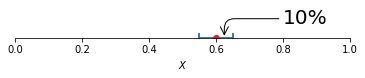

In [2]:
fig, ax = plt.subplots(figsize=(6,0.5))
ax.set_yticks([])
ax.set_xlim(0,1)
ax.set_ylim(0,1)
for side in ['top', 'left', 'right']:
    spine = ax.spines[side]
    spine.set_visible(0)
ax.scatter(0.6, 0, c=HC[0], zorder=2)
ax.errorbar(0.6, 0, xerr=0.1/2, ecolor=HC[1], elinewidth=2, zorder=1, capsize=5, capthick=2)
ax.annotate('10%', xy=(0.625, 0), xytext=(0.8, 0.5), fontsize=20,
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=90,rad=10"))
ax.set_xlabel('$X$')
plt.show()

Fraction of observations used $= 0.1$

## (b) Constant feature range, $p = 2$
##### Now suppose that we have a set of observations, each with measurements on $p = 2$ features, $X_1$ and $X_2$ . We assume that $(X_1, X_2)$ are uniformly distributed on $[0, 1] \times [0, 1]$. We wish to predict a test observation’s response using only observations that are within 10% of the range of $X_1$ and within 10% of the range of $X_2$ closest to that test observation. For instance, in order to predict the response for a test observation with $X_1 = 0.6$ and $X_2 = 0.35$, we will use observations in the range $[0.55, 0.65]$ for $X_1$ and in the range $[0.3, 0.4]$ for $X_2$. On average, what fraction of the available observations will we use to make the prediction?

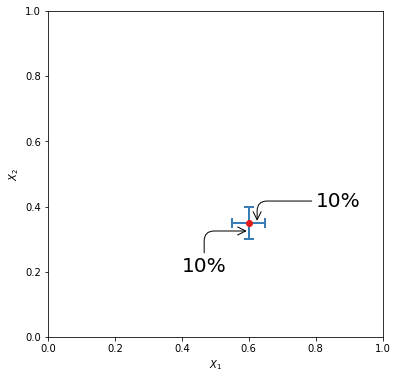

In [3]:
fig, ax = plt.subplots(figsize=(6,6))
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.scatter(0.6, 0.35, c=HC[0], zorder=2)
ax.errorbar(0.6, 0.35, xerr=0.1/2, yerr=0.1/2, ecolor=HC[1], elinewidth=2, \
            zorder=1, capsize=5, capthick=2)
ax.annotate('10%', xy=(0.625, 0.35), xytext=(0.8, 0.4), fontsize=20,
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=90,rad=10"))
ax.annotate('10%', xy=(0.6, 0.325), xytext=(0.4, 0.2), fontsize=20,
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=90,angleB=0,rad=10"))
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
plt.show()

Fraction of observations used $= 0.1 \times 0.1 = 0.01$

## (c) Constant feature range, $p = 100$
##### Now suppose that we have a set of observations on $p = 100$ features. Again the observations are uniformly distributed on each feature, and again each feature ranges in value from 0 to 1. We wish to predict a test observation’s response using observations within the 10% of each feature’s range that is closest to that test observation. What fraction of the available observations will we use to make the prediction?

Fraction of observations used $= 0.1^{100} = 1\mathrm{e}{-100}$

## (d) KNN with large $p$
##### Using your answers to parts (a)–(c), argue that a drawback of KNN when $p$ is large is that there are very few training observations "near" any given test observation.

The prediction accuracy of KNN depends on _how near the test observation_ the "nearest in training neighbours" are in feature space. When $p$ is large, given the same number of training observations, the _fraction_ of sufficiently-near training neighbours for a given test observation drops exponentially (distance measured along each feature axis individually as in a–c).

## (e) Constant fraction
##### Now suppose that we wish to make a prediction for a test observation by creating a p-dimensional hypercube centered around the test observation that contains, on average, 10% of the training observations. For $p = 1$, $2$, and $100$, what is the length of each side of the hypercube? Comment on your answer.

##### _Note: A hypercube is a generalization of a cube to an arbitrary number of dimensions. When $p = 1$, a hypercube is simply a line segment, when $p = 2$ it is a square, and when $p = 100$ it is a 100-dimensional cube._

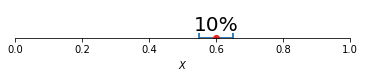

In [4]:
fig, ax = plt.subplots(figsize=(6,0.5))
ax.set_yticks([])
ax.set_xlim(0,1)
ax.set_ylim(0,1)
for side in ['top', 'left', 'right']:
    spine = ax.spines[side]
    spine.set_visible(0)
ax.scatter(0.6, 0, c=HC[0], zorder=2)
ax.errorbar(0.6, 0, xerr=0.1/2, ecolor=HC[1], elinewidth=2, zorder=1, capsize=5, capthick=2)
ax.text(0.6, 0.25, '10%', color='k', fontsize=20, ha='center')
ax.set_xlabel('$X$')
plt.show()

For $p = 1$, length of hypercube $= 0.1$

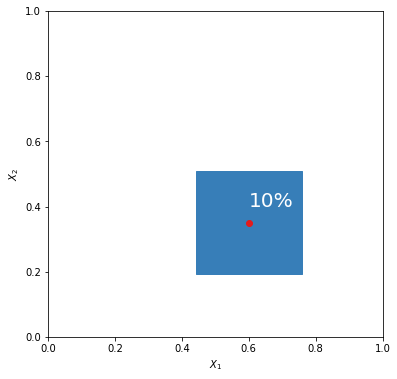

In [5]:
fig, ax = plt.subplots(figsize=(6,6))
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.scatter(0.6, 0.35, c=HC[0], zorder=2)
ax.add_patch(Rectangle(xy=(0.6-np.sqrt(0.1)/2, 0.35-np.sqrt(0.1)/2), \
                       width=np.sqrt(0.1), height=np.sqrt(0.1), \
                       color=HC[1], zorder=1))
ax.text(0.6, 0.4, '10%', color='w', fontsize=20)
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
plt.show()

For $p = 2$, length of hypercube $= \sqrt{0.1} \approx 0.316$

For $p = 100$, length of hypercube $= 0.1^{1/100} \approx 0.977$

As $p$ increases, the same fraction of neighbours are in fact more dispersed in feature space. In other words, as $p$ increases, given the same size of training sample, the $k$-th nearest-neighbours resides further and further away from the test observation in feature space.

# Exercise 5: LDA vs QDA
##### We now examine the diﬀerences between LDA and QDA.

**_REFERENCE_: ISL Section 2.2.2**

## (a) Linear
##### If the Bayes decision boundary is linear, do we expect LDA or QDA to perform better on the training set? On the test set?

QDA is a more flexible method compared to LDA, and hence is expected to result in higher model variance and lower model bias. But if the Bayes decision boundary is linear (n.b. this does not guarantee that the true boundary is linear), QDA has little advantage over LDA in terms the minimisation of model bias, while sufferring from a higher model variance (overfitting to the training set with a quadratic decision boundary). Thus, while QDA might have a slightly lower training error, it can potentially have a higher test error. 

In [6]:
def gen_linear_class(n_sample=100):
    '''Generate 2-class dataset with p=2 with a linear decision boundary.'''
    
    X = np.random.normal(size=(n_sample,2))
    beta = np.random.uniform(low=-1, high=1, size=3)
    y = beta[2]*X[:,0] + beta[1]*X[:,1] + beta[0]
    y = (y > np.median(y)).astype(int)
    
    return X, y

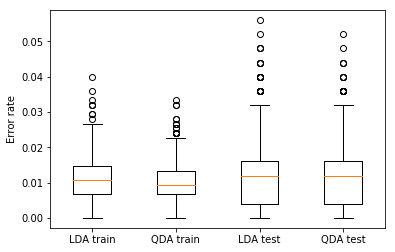

In [7]:
N_SAMPLE = 1000
TEST_RUN  = 1000

linear_mat = np.zeros((TEST_RUN, 4))

for j in range(TEST_RUN):

    # Generate random data for comparison
    X, y = gen_linear_class(N_SAMPLE)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

    for i, clf in enumerate([LinearDiscriminantAnalysis(), \
                             QuadraticDiscriminantAnalysis()]):

        clf.fit(X_train, y_train)
        train_acc = accuracy_score(y_train, clf.predict(X_train))
        test_acc = accuracy_score(y_test, clf.predict(X_test))

        linear_mat[j,i] = train_acc
        linear_mat[j,2+i] = test_acc
        
fig, ax = plt.subplots()
ax.boxplot(1-linear_mat)
ax.set_xticklabels(['LDA train', 'QDA train', 'LDA test', 'QDA test'])
ax.set_ylabel('Error rate')
plt.show()

## (b) Non-linear
##### If the Bayes decision boundary is non-linear, do we expect LDA or QDA to perform better on the training set? On the test set?

It will depend on how non-linear the Bayes decision boundary is. But in general, beyond a certain degree of non-linearity, QDA can capitalise on a lower model bias due to its flexibility in approximating a non-linear Bayes decision boundary. In this case, QDA should perform better than LDA on both training and test sets.

In [8]:
def gen_cubic_class(n_sample=100):
    '''Generate 2-class dataset with p=2 with a cubic decision boundary.'''
    
    X = np.random.normal(size=(n_sample,2))
    beta = np.random.uniform(low=-1, high=1, size=10)
    y = beta[9]*X[:,0]**3 + beta[8]*X[:,0]*X[:,1]**2 + \
        + beta[7]*X[:,0]**2*X[:,1] + beta[6]*X[:,1]**3 + \
        + beta[5]*X[:,0]**2 + beta[4]*X[:,0]*X[:,1] + beta[3]*X[:,1]**2 \
        + beta[2]*X[:,0] + beta[1]*X[:,1] + beta[0]
    y = (y > np.median(y)).astype(int)
    
    return X, y

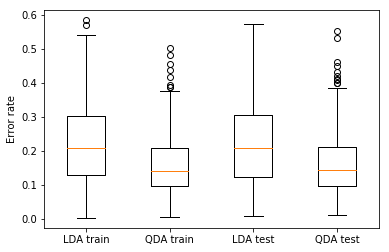

In [9]:
N_SAMPLE = 1000
TEST_RUN  = 1000

cubic_mat = np.zeros((TEST_RUN, 4))

for j in range(TEST_RUN):

    # Generate random data for comparison
    X, y = gen_cubic_class(N_SAMPLE)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

    for i, clf in enumerate([LinearDiscriminantAnalysis(), \
                             QuadraticDiscriminantAnalysis()]):

        clf.fit(X_train, y_train)
        train_acc = accuracy_score(y_train, clf.predict(X_train))
        test_acc = accuracy_score(y_test, clf.predict(X_test))

        cubic_mat[j,i] = train_acc
        cubic_mat[j,2+i] = test_acc
        
fig, ax = plt.subplots()
ax.boxplot(1-cubic_mat)
ax.set_xticklabels(['LDA train', 'QDA train', 'LDA test', 'QDA test'])
ax.set_ylabel('Error rate')
plt.show()

## (c) Sample size
##### In general, as the sample size n increases, do we expect the test prediction accuracy of QDA relative to LDA to improve, decline, or be unchanged? Why?

An increase in sample size results in a decrease in model variance, thus increases test prediction accuracy in general. When the sample size is small (thus not representative of the population), QDA has higher potential to overfit to the training set due to its higher flexibility, leading to a higher model variance compared to LDA. As this variance is alleviated with the increase in sample size, we expect the test prediction accuracy of QDA to increase at a higher rate than LDA. Therefore, QDA will improve relative to LDA.

In [10]:
%%time

N_RANGE = np.logspace(4, 7, 10, base=2, dtype=int)
TEST_RUN  = 1000

n_mat = np.zeros((2,2, TEST_RUN, len(N_RANGE)))

for m, generator in enumerate([gen_linear_class, gen_cubic_class]):
    
    for n, n_sample in enumerate(N_RANGE):
        
        for j in range(TEST_RUN):

            # Generate random data for comparison
            # Not sure if I should increase train+test or train size.
            # Currently train+test.
            X, y = generator(n_sample)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

            for i, clf in enumerate([LinearDiscriminantAnalysis(), \
                                     QuadraticDiscriminantAnalysis()]):

                clf.fit(X_train, y_train)
                test_acc = accuracy_score(y_test, clf.predict(X_test))

                n_mat[m,i,j,n] = test_acc

CPU times: user 2min 25s, sys: 2.59 s, total: 2min 28s
Wall time: 42.6 s


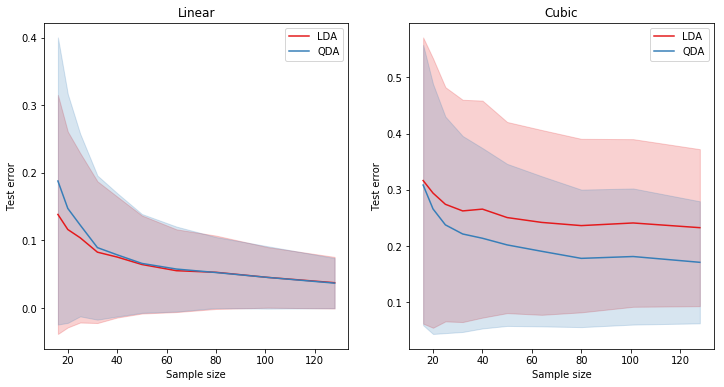

In [11]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
for i, (mat, ttl) in enumerate(zip(n_mat, ['Linear', 'Cubic'])):
    for scores, clr, lbl in zip(mat, [HC[0], HC[1]], ['LDA', 'QDA']):
        mean = 1 - np.mean(scores, axis=0)
        std = np.std(scores, axis=0)
        ax[i].plot(N_RANGE, mean, color=clr, label=lbl)
        ax[i].fill_between(N_RANGE, mean-std, mean+std, alpha=0.2, color=clr)
    ax[i].set_xlabel('Sample size')
    ax[i].set_ylabel('Test error')
    ax[i].set_title(ttl)
    ax[i].legend()
plt.show()

# Exercise 6: Logistic regression
##### Suppose we collect data for a group of students in a statistics class with variables $X_1 =$ hours studied, $X_2 =$ undergrad GPA, and $Y =$ receive an A. We ﬁt a logistic regression and produce estimated coeﬃcient, $\hat\beta_0 = −6$, $\hat\beta_1 = 0.05$, $\hat\beta_2 = 1$.

## (a) Predictors --> probability
##### Estimate the probability that a student who studies for 40 h and has an undergrad GPA of 3.5 gets an A in the class.

$$
\begin{align}
\hat p(X) = \hat Y &= \frac{\exp(\hat\beta_0 + \hat\beta_1 X_1 + \hat\beta_2 X_2)}{1 + \exp(\hat\beta_0 + \hat\beta_1 X_1 + \hat\beta_2 X_2)}\tag{4.7}\\
&= \frac{\exp(-6 + 0.05 \times 40 + 1 \times 3.5)}{1 + \exp(-6 + 0.05 \times 40 + 1 \times 3.5)}\\
&\approx 0.38
\end{align}
$$

## (b) Probability --> predictor
#####  How many hours would the student in part (a) need to study to have a 50% chance of getting an A in the class?

$$
\begin{align}
\frac{\exp(-6 + 0.05 X_1 + 1 \times 3.5)}{1 + \exp(-6 + 0.05 X_1 + 1 \times 3.5)} &= 0.5\\
2\cdot\exp(0.05 X_1 -3.5) &= 1 + \exp(0.05 X_1 -3.5)\\
\exp(0.05 X_1 -3.5) &= 1\\
\log\left(\exp(0.05 X_1 - 3.5)\right) &= \log(1)\\
0.05 X_1 - 3.5 &= 0\\
X_1 &= 70
\end{align}
$$

# Exercise 7: Bayes' theorem
##### Suppose that we wish to predict whether a given stock will issue a dividend this year ("Yes" or "No") based on $X$, last year's percent proﬁt. We examine a large number of companies and discover that the mean value of $X$ for companies that issued a dividend was $\bar X = 10$, while the mean for those that didn't was $\bar X = 0$. In addition, the variance of $X$ for these two sets of companies was $\hat\sigma^2 = 36$. Finally, 80% of companies issued dividends. Assuming that $X$ follows a normal distribution, predict the probability that a company will issue a dividend this year given that its percentage proﬁt was $X = 4$ last year.

##### _Hint: Recall that the density function for a normal random variable is $f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-(x-\mu)^2/{2\sigma^2}}$. You will need to use Bayes’ theorem._

Let $k=1$ be companies that issue dividends, thus $\mu_1 = 10$ and $\mu_2 = 0$, and $\pi_1 = 0.8$ and $\pi_2 = 1-0.8=0.2$.

$$
\begin{align}
p_1(X) &= \frac{\pi_1\cancel{(\sqrt{2\pi}\sigma)^{-1}}\exp\left(-(2\sigma^2)^{-1}\cdot(X-\mu_1)^2\right)}{\sum_{l=1}^K\pi_l\cancel{(\sqrt{2\pi}\sigma)^{-1}}\exp\left(-(2\sigma^2)^{-1}\cdot(X-\mu_l)^2\right)}\tag{4.12}\\
&= \frac{\pi_1\exp\left(-(2\sigma^2)^{-1}\cdot(X-\mu_1)^2\right)}{\pi_1\exp\left(-(2\sigma^2)^{-1}\cdot(X-\mu_1)^2\right) + \pi_2\exp\left(-(2\sigma^2)^{-1}\cdot(x-\mu_2)^2\right)}\\
&= \frac{0.8\exp\left(-(2 \times 36)^{-1}\cdot(4-10)^2\right)}{0.8\exp\left(-(2 \times 36)^{-1}\cdot(4-10)^2\right) + 0.2\exp\left(-(2 \times 36)^{-1}\cdot(4-0)^2\right)}\\
&\approx 0.752
\end{align}
$$

# Exercise 8: Errors
##### Suppose that we take a data set, divide it into equally-sized training and test sets, and then try out two diﬀerent classiﬁcation procedures. First we use logistic regression and get an error rate of 20% on the training data and 30% on the test data. Next we use 1-nearest neighbors (i.e. K = 1) and get an average error rate (averaged over both test and training data sets) of 18%. Based on these results, which method should we prefer to use for classiﬁcation of new observations? Why?

$\because$ training size = test size, for the 1-nearest neighbour classification,
$$
\epsilon_{average} = 0.18 = \frac{\epsilon_{train} + \epsilon_{test}}{2}
$$
$\because \epsilon_{train} = 0$ for KNN-1,
$$
\begin{align}
\frac{0 + \epsilon_{test}}{2} &= 0.18\\
\epsilon_{test} &= 0.36\\
&\gt 0.3
\end{align}
$$

We should choose logistic regression because it has a lower test error.

# Exercise 9: Odds
##### This problem has to do with _odds_.

## (a) Odds --> probability
##### On average, what fraction of people with an odds of 0.37 of defaulting on their credit card payment will in fact default?

$$
\begin{align}
\text{odds} &= \frac{p(X)}{1-p(X)}\tag{c.f. 4.3}\\
0.37 &= \frac{p(X)}{1-p(X)}\\
0.37 - 0.37p(X) &= p(X)\\
p(X) &\approx 0.270
\end{align}
$$

## (b) Probability --> odds
##### Suppose that an individual has a 16% chance of defaulting on her credit card payment. What are the odds that she will default?

$$
\begin{align}
\text{odds} &= \frac{p(X)}{1-p(X)}\\
&= \frac{0.16}{1-0.16}\\
&\approx 0.190
\end{align}
$$